## Self Study 5: Logistic Map and Chaos

In past lectures, we have discussed the logistic growth model in continuous time, which describes the growth of populations within the constraints of environmental resources and carrying capacity. This model is characterized by the equation:

$$ 
\frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right)
$$

where $P$ is the population size,$r$ the intrinsic growth rate, and $K$ the carrying capacity.

Now we explore its *discrete* counterpart: the logistic map.

$$
P_{n+1} = rP_n \left(1 - \frac{P_n}{K}\right)
$$

where $P_{n}$ is the population size at time step $n$.
Despite its simplicity, the logistic map exhibits rich behaviors that we might intuitively not expect by simply moving from continous to discrete.

In this exercise, we will assume $K=1$ for simplicity.

**Note** Notation is different from Lecture.

## Section 1: From Continuous to Discrete

### Task 1: Logistic Growth as a Continuous Function

Plot the logistic growth function with interactive sliders for $r$ and $P_0$

In [43]:
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np
from scipy.integrate import odeint

# plt.style.use('seaborn-v0_8-whitegrid') # uncomment to make plots look nicer

# YOUR CODE HERE
# logistic growth
def dPdt(P, t, r):
    return r * P * (1 - P)

def plot_logistic_growth(P0, r):
    t = np.linspace(0, 100, 400)
    #P0 = 0.1 
    #r = 0.3

    P = odeint(dPdt, P0, t, args=(r,))
    

    plt.figure(figsize=(8, 5))
    plt.plot(t, P)
    plt.xlabel('Time')
    plt.ylabel('Population $P$')
    plt.title('Continuous Logistic Growth')

interact(plot_logistic_growth, P0=(0, 1., .1), r=(0, 1, .1))

interactive(children=(FloatSlider(value=0.5, description='P0', max=1.0), FloatSlider(value=0.0, description='r…

<function __main__.plot_logistic_growth(P0, r)>

### Task 2: Define Logistic Map and plot its evolution

Define the *recurrence equation* of the logistic map as a function of $P_n$ and $r$. Then plot the evolution of the population size for different values of $r$ and $P_0$.

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(r, p0, n):
    """
    - r: growth parameter 
    - p0: initial population size 
    - n: number of iterations
    
    Returns:
    - p: array of n+1 values from p0 to p_n
    """
    p = np.zeros(n + 1)
    p[0] = p0
    for i in range(n):
        p[i + 1] = r * p[i] * (1 - p[i])
    return p

def plot_logistic_map(r, p0, n):
    # Parameters
    

    trajectories = {}
    # Compute trajectories for different r
    trajectories = logistic_map(r, p0, n)

    # Plot
    plt.figure(figsize=(10, 6))
    iterations = np.arange(n + 1)

    plt.plot(iterations, trajectories, label=f'r={r}')

    plt.xlabel('Iteration n')
    plt.ylabel('Population Size P_n')
    plt.title(f'Logistic Map: Population Evolution for Different r')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

interact(plot_logistic_map, 
         r=(2, 4, 0.01), 
         p0=(0.01, 0.99, 0.01), 
         n=(10, 100, 10))

interactive(children=(FloatSlider(value=3.0, description='r', max=4.0, min=2.0, step=0.01), FloatSlider(value=…

<function __main__.plot_logistic_map(r, p0, n)>

Define a function that iterates the logistic map for $n$ steps, starting from $P_0$. Note that since it is discrete, we don't use `odeint`, but a for loop.

In [45]:
def logistic_dynamics(P0, r, n):
    """Compute the first n iterations of the logistic map with parameter r
    
    P0 (float): initial value
    r (float): parameter
    n (int): number of iterations
    """
    vals = np.empty(n + 1)
    vals[0] = P0
    for i in range(n):
        vals[i + 1] = r * vals[i] * (1 - vals[i])
    return vals

print("Honestly I didn't understand the question.")
print("In the previous cell I already did something similar,\nbut probably not exactly what was asked \nand I'm missing something")

Honestly I didn't understand the question.
In the previous cell I already did something similar,
but probably not exactly what was asked 
and I'm missing something


**Questions:** What is the fundemental difference in modelling $P_{n+1}$ vs $\frac{dP}{dt}$? What is the difference in the way we solve the two equations?

**Continuous Logistic Growth**

$\frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right)$ is a differential equation in continuous time, meaning that the population changes continuously for each $t \in \mathbb{R}$.
In particular, $\frac{dP}{dt}$ describes the rate of change at each $t$, and from that rate we compute the following $P$.
To solve the equation and obtain a time series for $P$, we therefore use integration (numerical or analytical) to obtain $P$.


**Discrete Time Logistic Growth**

$P_{n+1} = rP_n \left(1 - \frac{P_n}{K}\right)$ is a recurrence equation in discrete time, where the population evolves at each $n$ from the previous value. 
Each iteration is therefore computed directly from the previous one (using a simple loop), without integrations and approximations.

Beyond the solving method, there's a key difference in the dynamic behavior between the two models: the continuous model always converges (for some $r$) to a stable equilibrium, therefore it has a predictable behavior.
The discrete one, on the other side, can show different behaviors:
- $r < 1$: extinction
- $1 < r < 3$: convergence to a fixed point
- $3 < r < 3.57$: continuous oscillations
- $r > 3.57$: chaos
- $r > 4$: divergence
 
**Questions:** What do you observe about the behavior of the logistic map as $r$ increases? What happens when $r$ is greater than 1, 3, 4?


As $r$ increases, the logistic map exhibits different regimes:

- **$r < 1$**: Population decays to zero (extinction)
- **$1 < r < 3$**: Converges to a stable fixed point $P^* = \frac{r-1}{r}$
- **$r = 3$**: Bifurcation point - fixed point loses stability
- **$3 < r < 3.57$**: Periodic oscillations (period 2, 4, 8, ... - period doubling cascade)
- **$r > 3.57$**: Chaotic behavior - aperiodic, unpredictable dynamics
- **$r > 4$**: Population escapes the interval $[0,1]$ and diverges



**Question:** What happens at $r=3.9$ and $P_0$ changes? 


At $r=3.9$, the system is deep in the chaotic regime and exhibits **extreme sensitivity to initial conditions**. Even tiny differences in $P_0$ (e.g., $P_0 = 0.5$ vs $P_0 = 0.5001$) produce trajectories that initially appear similar but diverge exponentially after just a few iterations, resulting in completely different long-term behavior. 

## Section 2: Cobweb Plot

Above in the iterative generation of $P_n$ we have done applied the logistic map $f$ to an initial value of $P_0$ repeatedly, creating a sequence such as $ f(P_0), f(f(P_0)), f(f(f(P_0))), \ldots $. This process can be visualised with a cobweb plot.
This is a technique not unique to the logistic map but applicable to any iterative function.
The purpose of the cobweb plot is to understand *how* the function $f$ behaves as it is iteratively applied to its own output.


Here's a step by step explanation of the construction of a cobweb plot:

1. Plot the function $f(x) $.
2. Plot the identity line $y = x$.
3. Start at the initial point $(x_0, x_0)$ located on the identity line.
4. Vertical move: From $(x_0, x_0)$, draw a vertical line to $(x_0, f(x_0))$. This step represents the application of the function $f$ to the initial value.
5. Horizontal move: Next, draw a horizontal line from $(x_0, f(x_0))$ to $(f(x_0), f(x_0))$ updating the input value to $x_1 = y_0 = f(x_0)$.
6. Repeat the vertical and horizontal movements.


I provide most of the code for the cobweb plot below. You have to add the two lines:

1) plot the *vertical* move: $(x_n, x_n)$ to $(x_n, y_n)$
2) plot the *horizontal* move: $(x_n, y_n)$ to $(y_n, y_n)$.

Where $y_n = f(x_n)$.

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_map(x, r):
    """
    Logistic map function.
    """
    return r * x * (1 - x)


def annotate_point(ax, x, y, text, xytext=(0, 0)):
    """
    Annotate a point on a matplotlib axis.
    """
    ax.annotate(text,
                    xy=(x, y), xycoords='data',
                    xytext=xytext, textcoords='offset points',
                    arrowprops=dict(arrowstyle="->",
                                    connectionstyle="arc3,rad=.2"))


def plot_cobweb(f, x0, n, show_annotation=True, **f_kwargs):
    """
    Plot the cobweb plot for a function f, starting point x0, and number of steps n.
    
    Args:
        f (function): Function of the form f(x, **f_kwargs), where x is a float and f_kwargs are additional keyword arguments.
        x0 (float): Initial value.
        n (int): Number of iterations.
        show_annotation (bool): Whether to show annotations for the first iteration.
        **f_kwargs: Additional keyword arguments to pass to f.
    """
    # Initialize figure
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    
    # Plot y = f(x) and y = x
    #y = x fixed points
    
    
    x = np.linspace(0, 1, 500)
    y = f(x, **f_kwargs)
    ax.plot(x, y, 'blue', lw=1, label='$f$')
    ax.plot(x, x, 'gray', lw=.5, label='Identity line', linestyle='dashed')
    
    x_n = x0
    for i in range(n):
        y_n = f(x_n, **f_kwargs)
        
        # 1. Plot vertical move. Use ax.plot
        ax.plot([x_n, x_n], [x_n, y_n], 'red', lw=1)
        # 2. Plot horizontal move
        ax.plot([x_n, y_n], [y_n, y_n], 'red', lw=1)

        # Annotate first iteration
        if i == 0 and show_annotation:
            ax.plot([x0], [x0], 'ok')
            annotate_point(ax, x0, x0, 'Initial Point\n$(x_0, x_0)$', xytext=(-50, 30))
            annotate_point(ax, x_n, y_n, 'Apply $f$\n$(x_0, f(x_0))$', xytext=(-50, 10))
            annotate_point(ax, y_n, y_n, 'First iteration\n$(f(x_0), f(x_0))$', xytext=(-50, -50))
        
        # Update the point
        x_n = y_n

    # Set labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    
    # turn off grid
    ax.grid(False)
    
    # Display the plot
    plt.show()

# Plot cobweb plot for logistic map with r=2.6 and x0=0.2, for 100 iterations


@interact
def plot_cw(r=(.5, 4.1, .1,), x0=(0.01, 1., 0.05), n=(0, 10, 1), show_annotation=True):
    plot_cobweb(f=logistic_map, n=n, x0=x0, show_annotation=show_annotation, r=r)

interactive(children=(FloatSlider(value=2.2, description='r', max=4.1, min=0.5), FloatSlider(value=0.46, descr…

### Task 1: Explore the parameters of the cobweb plot of the logistic map

**Question:** What do you observe in the cobweb plot as $r$ increases? What happens when $r$ is greater than 1, 3, 4? Why does this happen, graphically?

**Answer:**
As $r$ increases, the parabola becomes steeper. The cobweb paths lengthen and become more "bouncy," reflecting growing amplification of deviations before settling.

For $r > 1$, the fixed point shifts from $x^* = 0$ (unstable) to a new attracting fixed point. The cobweb no longer converges to 0 but spirals or approaches this interior point monotonically (for $1 < r < 3$).

For $r > 3$ the path no longer settles to one point but loops indefinitely.

At $r = 4$ there's full chaos. The fixed point and all periodic cycles are unstable, and the cobweb becomes dense.

**Question:** What happens at $r>4$? Looking at $f(x)$ what is the intuition for why higher values behave this way? **Hint:** Keep the iterations low i.e., $n<5$ to be able to see the behavior.  

**Answer:**
For $r > 4$, the function $f(x) = rx(1-x)$ can produce values outside the interval $[0, 1]$. When $r > 4$, the parabola's maximum exceeds 1, so iterates can escape the unit interval and diverge. The cobweb shows trajectories that leave the valid domain $[0, 1]$, resulting in unbounded or negative values. This can be clearly seen by changing the value of $P_0$ and observing that the graph changes drastically depending on the initial condition.

### Task 2: Apply the cobweb plot to other functions

Define two functions (one linear one "complex") and visualize how the cobweb evolves.

**Question:** How does your function behave differently from the logistic map? Why?

**Answer:**

In [47]:
import math

def lin_fun(x, a, b):
    return a * x + b

def natural_log(x):
    return np.log(x)

def sin(x):
    return np.sin(x)


In [48]:
@interact
def plot_cw(a = (0.01, 1., 0.05), b = (0.01, 1., 0.05), x0=(0.01, 1., 0.05), n=(0, 10, 1), show_annotation=True):
    plot_cobweb(f=lin_fun, n=n, x0=x0, show_annotation=show_annotation, a = a, b = b)

interactive(children=(FloatSlider(value=0.46, description='a', max=1.0, min=0.01, step=0.05), FloatSlider(valu…

In [49]:
@interact
def plot_cw(x0=(0.01, 1., 0.05), n=(0, 10, 1), show_annotation=True):
    plot_cobweb(f=natural_log, n=n, x0=x0, show_annotation=show_annotation)

interactive(children=(FloatSlider(value=0.46, description='x0', max=1.0, min=0.01, step=0.05), IntSlider(value…

In [50]:
@interact
def plot_cw(x0=(0.01, 1., 0.05), n=(0, 10, 1), show_annotation=True):
    plot_cobweb(f=sin, n=n, x0=x0, show_annotation=show_annotation)

interactive(children=(FloatSlider(value=0.46, description='x0', max=1.0, min=0.01, step=0.05), IntSlider(value…

## Section 3: Bifurcation Diagram

For the logistic map, the bifuraction diagram depicts the long-term values at which the system settles for each value of the growth rate parameter $ r $. The diagram is constructed by iterating the logistic map for a range of values of $ r $.

Here is a step-by-step description of how to construct a bifurcation diagram for the logistic map:

1. Write a function that for a given $r$ and $P_0$ iterates the logistic map for $n$ steps and returns the last $m$ values of $P$. By taking only the last $m$ values, we are ignoring the transient behavior of the system.
2. For $2.5<r<4$ iterate this function and store the last $m$ values of $P$.
3. Plot $r$ on the x-axis and the list of $P$ values on the y-axis, i.e., the bifurcation diagram.

In [51]:
def logistic_dynamics(P0, r, n, m):
    """
    Genera e restituisce gli ultimi m valori della mappa logistica dopo n iterazioni di transiente.

    Args:
        P0 (float): valore iniziale
        r (float): parametro di crescita
        n (int): numero di iterazioni di transiente da scartare
        m (int): numero di valori finali da restituire

    Returns:
        numpy.ndarray: array degli ultimi m valori di P
    """
    vals = np.empty(n + m + 1)
    vals[0] = P0
    for i in range(n + m):
        vals[i + 1] = r * vals[i] * (1 - vals[i])
    return vals[n + 1 : n + m + 1]

# Esempio di utilizzo:
prova = logistic_dynamics(0.1, 3.5, 10, 6)
print(prova)

[0.41089828 0.84721309 0.45305075 0.86728519 0.40285557 0.84197036]


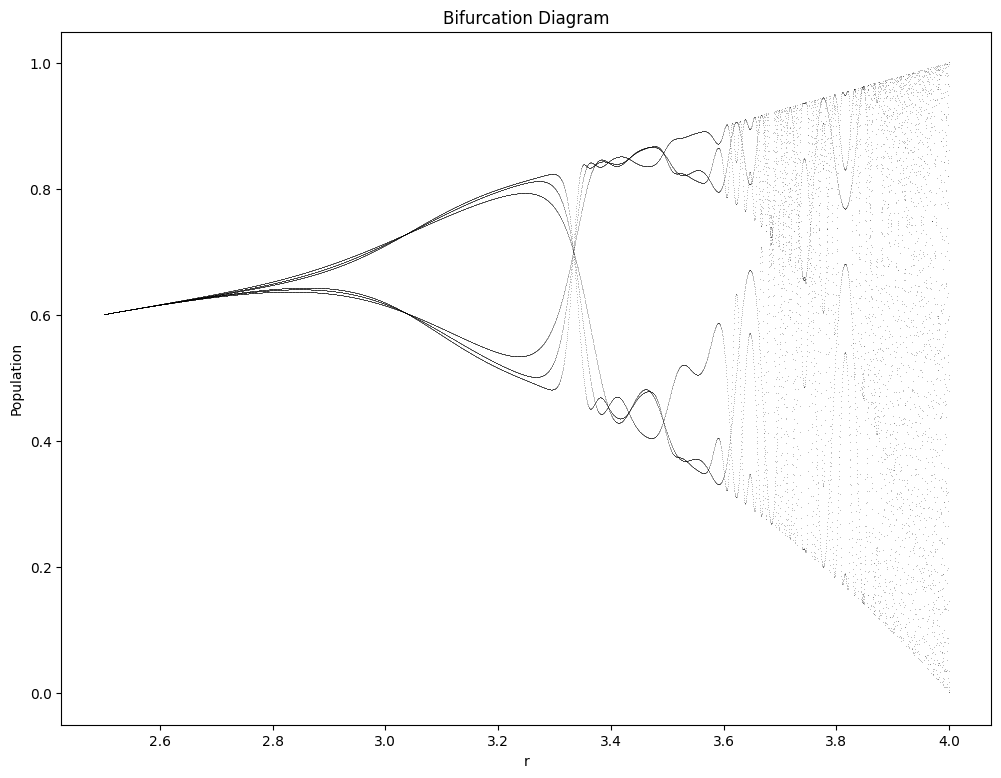

In [52]:
def plot_bifurcation(r_values, P0, n, m):
    """
    Plot the bifurcation diagram for the logistic map.
    
    Parameters:
        r_values (array-like): An array of r values to iterate over.
        P0 (float): The initial population size.
        n (int): The total number of iterations per r value.
        last (int): The number of iterations to plot to show long-term behavior.
    """
    # Initialize the array to hold the data points to plot
    r_points = [] # this be a list of r values corresponding to the P_points
    P_points = [] # this will be a list of P values corresponding to the r_points

    # Loop over the r values
    for r in r_values:
        P = logistic_dynamics(P0, r, n, m)
        
        r_points.extend([r] * m) # add r to the r_points list "m" times
        P_points.extend(P)
    
    # Plot the bifurcation diagram
    plt.figure(figsize=(12, 9))
    plt.plot(r_points, P_points, ',k', alpha=0.25)
    plt.title("Bifurcation Diagram")
    plt.xlabel('r')
    plt.ylabel('Population')
    plt.show()


r_values = np.linspace(2.5, 4.0, 4000)
plot_bifurcation(r_values, P0=0.1, n=10, m=6)

**Question:** What do you observe in the bifurcation diagram as $ r $ increases? What happens when $ r $ is greater than 2.6, 3.2, 3.5, and 3.9? What happens there in terms of "stability"?

As $r$ increases, the bifurcation diagram shows a transition from simple to complex dynamics:

- For $r < 2.6$: the system quickly converges to a stable fixed point.
- For $r > 2.6$: the first bifurcation occurs, and the population oscillates between two values (period 2).
- For $r > 3.2$: further bifurcations appear, with oscillations between 4, 8, 16 values (period doubling).
- For $r > 3.5$: windows of chaos emerge, and the population spreads in an apparently random way; small changes in r or P0 lead to completely different trajectories.
- For $r > 3.9$: chaos dominates, stability is lost, and the system is extremely sensitive to initial conditions.

**Question:** How is this bifurcation diagram different from bifurcation diagrams for continuous systems we have seen in the past?


Continuous systems show smooth transitions between equilibria and periodic solutions. Bifurcations are limited and chaos is rare.
Discrete systems (like the logistic map) display much richer and more complex behavior: a cascade of period-doubling bifurcations, frequent chaos, windows of regularity, and extreme sensitivity to initial conditions.